<a href="https://colab.research.google.com/github/Yu-Hayung/Artificial-intelligence_preparation-training/blob/main/%EC%83%9D%ED%99%9C%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EBS 이숲 (생활데이터 분석)



In [1]:
a = [242, 256, 237, 223, 263, 81, 46]
print('A = ', a )

A =  [242, 256, 237, 223, 263, 81, 46]


In [2]:
n = len(a)
my_sum = 0
my_avg = 0 
i = 0

for i in range(0, n):
    my_sum = my_sum + a[i]

    my_avg = my_sum/n
    print('Total Sum:', my_sum)
    print('Total Average: ', my_avg)
    print('------------------------------------')

Total Sum: 242
Total Average:  34.57142857142857
------------------------------------
Total Sum: 498
Total Average:  71.14285714285714
------------------------------------
Total Sum: 735
Total Average:  105.0
------------------------------------
Total Sum: 958
Total Average:  136.85714285714286
------------------------------------
Total Sum: 1221
Total Average:  174.42857142857142
------------------------------------
Total Sum: 1302
Total Average:  186.0
------------------------------------
Total Sum: 1348
Total Average:  192.57142857142858
------------------------------------


## 데이터 불러오기 

In [10]:
from google.colab import files
myfile = files.upload()

Saving passby_data.CSV to passby_data.CSV


In [14]:
import csv
a = [[],[],[],[],[],[],[]]


with open('/content/passby_data.CSV','r')as f:
  reader = csv.DictReader(f)
  i = j = 0
  for row in reader:
    a[i].append(row)
    j = j +1 
    if(j % 24 == 0):
      i = i + 1

x_title = ['MON', "TUE", "WED", "THR", "FRI", "SAT", "SUN"]

for i in range(0 , 7):
  for j in range(0, len(a[i])):
    print(x_title[i], '[',j,']=', a[i][j])

MON [ 0 ]= OrderedDict([('num', '0'), ('wnum', '0'), ('ynum', '0')])
MON [ 1 ]= OrderedDict([('num', '0'), ('wnum', '0'), ('ynum', '0')])
MON [ 2 ]= OrderedDict([('num', '0'), ('wnum', '0'), ('ynum', '0')])
MON [ 3 ]= OrderedDict([('num', '0'), ('wnum', '0'), ('ynum', '0')])
MON [ 4 ]= OrderedDict([('num', '0'), ('wnum', '0'), ('ynum', '0')])
MON [ 5 ]= OrderedDict([('num', '7'), ('wnum', '5'), ('ynum', '6')])
MON [ 6 ]= OrderedDict([('num', '4'), ('wnum', '1'), ('ynum', '3')])
MON [ 7 ]= OrderedDict([('num', '20'), ('wnum', '1'), ('ynum', '16')])
MON [ 8 ]= OrderedDict([('num', '22'), ('wnum', '0'), ('ynum', '16')])
MON [ 9 ]= OrderedDict([('num', '17'), ('wnum', '4'), ('ynum', '16')])
MON [ 10 ]= OrderedDict([('num', '5'), ('wnum', '1'), ('ynum', '5')])
MON [ 11 ]= OrderedDict([('num', '13'), ('wnum', '5'), ('ynum', '13')])
MON [ 12 ]= OrderedDict([('num', '19'), ('wnum', '11'), ('ynum', '18')])
MON [ 13 ]= OrderedDict([('num', '9'), ('wnum', '5'), ('ynum', '1')])
MON [ 14 ]= Ordered

### 시간대별 인구수 데이터 가공 

In [22]:
# 데이터로부터 시간대별 평균 유동 인구수 구하기

day_title = ['MON', 'TUE', 'WED', 'THR', 'FRI', 'SAT', 'SUN']     # 요일 제목
hour_title = ['01', '02', '03', '04', '05', '06', \
              '07', '08','09', '10', '11', '12', \
              '13', '14','15', '16', '17', '18', \
              '19', '20','21', '22', '23', '24',]


# 시간대별로 주간 평균값 구하기
avgh = []
for j in range(0, 24) :                          # 0~23시간만큼 19~24행 반복                     
    day_sum = 0                                  # 시간대별 합을 구하기 위해 0으로 초기화
    # j번째 시간대 주간 총합
    for i in range (0, 7) :                      # 일주일, 즉 7번 반복하기
        day_sum = day_sum + int(a[i][j]['num'])  # i번째 요일에 j번째 시간대별 행인수 누적하기

    avgh.append(day_sum/7)                       # j번째 시간대 주간 행인수 평균 구하기



# 시간대별 평균 유동 인구 출력하기
for j in range (0, 24) :                         # 24번 반복
    print("[~{0}:00]: {1:4}". format(hour_title[j], int(avgh[j])))    # 시간대별 유동 인구수 출력


[~01:00]:    1
[~02:00]:    0
[~03:00]:    0
[~04:00]:    0
[~05:00]:    0
[~06:00]:    2
[~07:00]:    2
[~08:00]:   12
[~09:00]:   16
[~10:00]:   10
[~11:00]:    3
[~12:00]:   19
[~13:00]:   17
[~14:00]:    7
[~15:00]:    9
[~16:00]:   12
[~17:00]:    9
[~18:00]:    8
[~19:00]:   17
[~20:00]:   15
[~21:00]:   11
[~22:00]:    5
[~23:00]:    6
[~24:00]:    4


## (유동인구 수 ) 그래프로 시각화 

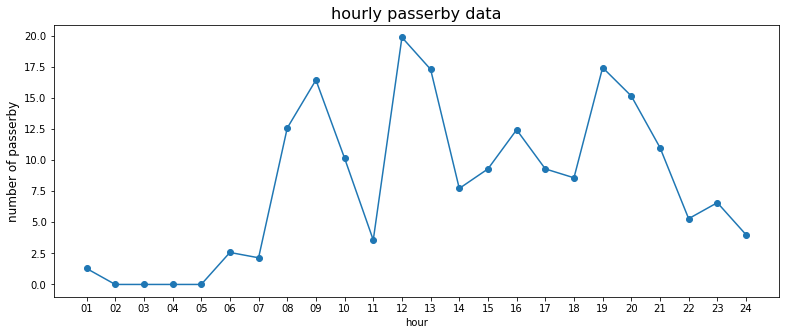

In [24]:

import matplotlib.pyplot as plt                     # 그래프를 출력하기 위한 모듈

# 그래프의 제목 붙이기 

plt.figure(figsize = (13,5))
plt.title("hourly passerby data", fontsize = 16)    # 큰 제목
plt.xlabel("hour", fontsize=10)                     # x축 제목
plt.ylabel("number of passerby", fontsize=12)       # y축 제목   

plt.scatter(hour_title, avgh)                       # 꺽은선 그래프 그리기
plt.plot(hour_title, avgh)
plt.show()


# 행인수 , 여성행인수 , 30대 연령 행인수 시각화 그래프 

In [27]:
with open('/content/passby_data.CSV', 'r') as f :
    reader = csv.DictReader(f)
    i = j = 0
    for row in reader :
        a[i].append(row)
        j = j+ 1
        if(j %24 == 0):
            i = i +1

avgh , avghw , avghy = [], [], []
for j in range(0, 24):
    day_sum = 0
    day_wsum = 0
    day_ysum = 0
    
    for i in range (0,7):
        day_sum = day_sum + int(a[i][j]['num'])
        day_wsum = day_wsum + int(a[i][j]['wnum'])
        day_ysum = day_wsum + int(a[i][j]['ynum'])
    
    avgh.append(day_sum/7)
    avghw.append(day_wsum/7)
    avghy.append(day_ysum/7)


day_title = ['MON', 'TUE', 'WED', 'THR', 'FPI', 'SAT', 'SUN'] 
hour_title = ['01','02','03', '04','05','06','07','08','09','10',\
             '11','12','13','14','15','16','17','18','19','20','21','22','23','24']

print('시간대 행인수 여성 30 대 이하')


for j in range(0, 24):
    print("[~{0}:00]: {1:4} {2:6} {3:7}".format(hour_title[j], int(avgh[j]), int(avghw[j]),  int(avghy[j])))

    

시간대 행인수 여성 30 대 이하
[~01:00]:    1      0       0
[~02:00]:    0      0       0
[~03:00]:    0      0       0
[~04:00]:    0      0       0
[~05:00]:    0      0       0
[~06:00]:    2      1       1
[~07:00]:    2      1       1
[~08:00]:   12      2       2
[~09:00]:   16      7       7
[~10:00]:   10      4       4
[~11:00]:    3      1       1
[~12:00]:   19      9      11
[~13:00]:   17      9      11
[~14:00]:    7      2       2
[~15:00]:    9      8       8
[~16:00]:   12     10      10
[~17:00]:    9      8       8
[~18:00]:    8      3       3
[~19:00]:   17      8       8
[~20:00]:   15      7       7
[~21:00]:   11      4       4
[~22:00]:    5      2       2
[~23:00]:    6      3       3
[~24:00]:    4      2       2


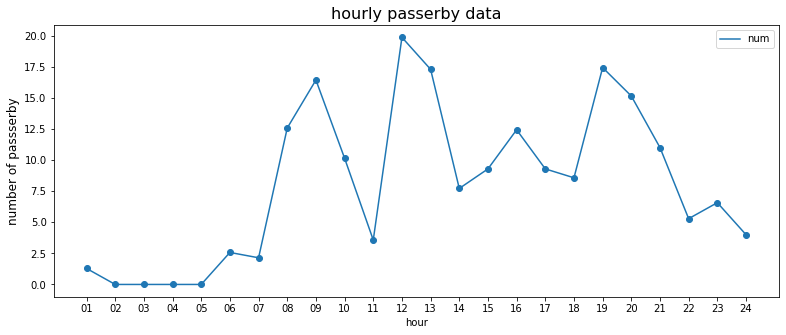

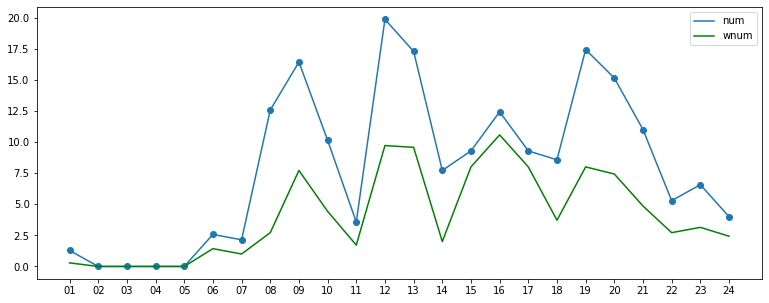

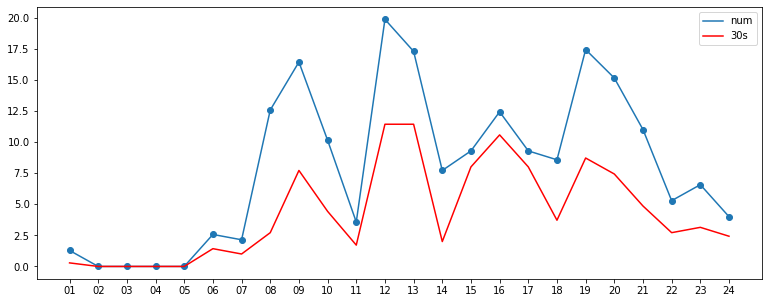

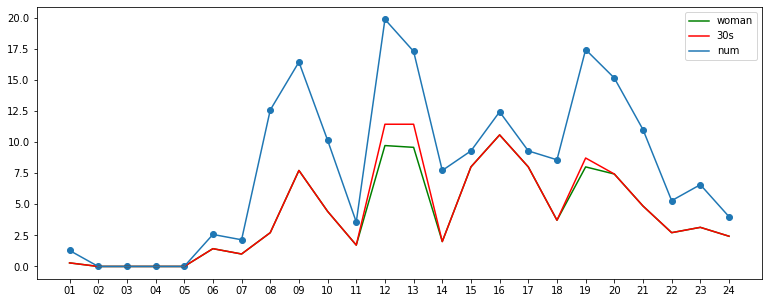

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize = (13,5))

plt.title('hourly passerby data', fontsize = 16)
plt.xlabel('hour', fontsize = 10)
plt.ylabel('number of passserby', fontsize = 12)

plt.scatter(hour_title, avgh)
plt.plot(hour_title, avgh, label = 'num')
plt.legend()
plt.show()

plt.figure(figsize = (13,5))
plt.scatter(hour_title, avgh)
plt.plot(hour_title, avgh, label = 'num')
plt.plot(hour_title, avghw, c = 'green', label = 'wnum')
plt.legend()
plt.show()

plt.figure(figsize = (13,5))
plt.scatter(hour_title, avgh)
plt.plot(hour_title, avgh, label = 'num')
plt.plot(hour_title, avghy, c = 'red', label = '30s')
plt.legend()
plt.show()

plt.figure(figsize = (13,5))
plt.plot(hour_title, avghw, c = 'green', label = 'woman')
plt.plot(hour_title, avghy,  c = 'red', label = '30s')
plt.plot(hour_title, avgh, label = 'num')
plt.scatter(hour_title, avgh)
plt.legend()
plt.show()


# < 해설 >

출근 시간, 점시 시간, 퇴근 시간 으로 보이는 오전, 오후 시간 때 행인의 수가 많음을 보여 준다. 

30대 행인들은 대부분 여성과 일치함을 볼 수 있다. 